In [1]:
pip install plottable

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install mplsoccer

   ---------------------------------------- 0.0/79.0 kB ? eta -:--:--
   --------------- ------------------------ 30.7/79.0 kB 1.3 MB/s eta 0:00:01
   ------------------------------- -------- 61.4/79.0 kB 812.7 kB/s eta 0:00:01
   ---------------------------------------- 79.0/79.0 kB 550.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install highlight_text

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image

from highlight_text import fig_text, ax_text

In [1]:
import os
import matplotlib.font_manager as fm
from mplsoccer import FontManager

In [7]:
df_fbref = pd.read_html('https://fbref.com/pt/comps/24/Serie-A-Estatisticas')

In [8]:
df_geral_raw = df_fbref[0]

In [ ]:
# Salvando arquivo na pasta raw

#df_geral_raw.to_csv('C:/Users/jeverton.rosa/lab_data/DA_python_soccer/data/raw/df_geral_raw.csv')


In [9]:
df_geral_raw.head()

,Cl,Equipe,MP,V,E,D,GP,GC,GD,Pt,Pts/PPJ,xG,xGA,xGD,xGD/90,Público,Artilheiro da equipe,Goleiro,Notas
0,1,Palmeiras,38,20,10,8,64,33,31,70,184,57.2,39.3,17.9,47,28.676,Endrick - 11,Wéverton,NaN
1,2,Grêmio,38,21,5,12,63,56,7,68,179,50.0,55.3,-5.3,-14,27.110,Luis Suárez - 17,Gabriel Chapecó,NaN
2,3,Atlético Mineiro,38,19,9,10,52,32,20,66,174,46.6,40.8,5.8,15,22.119,Paulinho - 20,Éverson,NaN
3,4,Flamengo,38,19,9,10,56,42,14,66,174,49.8,45.1,4.7,12,45.274,Pedro - 13,Matheus Cunha,NaN
4,5,Botafogo (RJ),38,18,10,10,58,37,21,64,168,50.1,48.8,1.3,3,26.477,Tiquinho Soares - 17,Lucas Perri,NaN


In [10]:
escudos = pd.read_csv('C:/Users/jeverton.rosa/lab_data/DA_python_soccer/data/raw/escudos.csv', delimiter=';')

In [11]:
df = pd.merge(df_geral_raw, escudos, on='Equipe', how='left')

In [12]:
# Adicionando brasão do time no dataframe

from PIL import Image
import urllib
import pandas as pd


fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'

# Função para baixar as imagens
def baixar_brasao(escudo_id):
    try:
        url = f"{fotmob_url}{escudo_id}.png"
        imagem = Image.open(urllib.request.urlopen(url))
        return imagem
    except Exception as e:
        print(f"Erro ao baixar a imagem para o escudo {escudo_id}: {str(e)}")
        return None

# Adicionando a coluna 'Brasao' ao DataFrame
df['Brasao'] = df['Escudo'].apply(baixar_brasao)

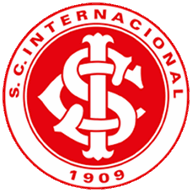

In [13]:
df['Brasao'][8]

In [14]:
# Selecionando colunas para conversão do tipo de dado

df[['xG', 'xGA', 'xGD', 'xGD/90']] = df[['xG', 'xGA', 'xGD', 'xGD/90']].astype(float)

In [15]:
# Selecionando as colunas que irão para a tabela final e sua ordem de apresentaçãoabs

df_tab = df[[
    'Cl', 'Brasao', 'Equipe', 'MP', 'V', 'E', 'D', 'GP', 'GC', 'GD', 'Pt', 'Pts/PPJ', 'xG', 'xGA', 'xGD', 'xGD/90'
]]

In [22]:
df_tab.head()

,Cl,Brasao,Equipe,MP,V,E,D,GP,GC,GD,Pt,Pts/PPJ,xG,xGA,xGD,xGD/90
0,1,<PIL.PngImagePlugin.PngImageFile image mode=P ...,Palmeiras,38,20,10,8,64,33,31,70,184,57.2,39.3,17.9,47.0
1,2,<PIL.PngImagePlugin.PngImageFile image mode=P ...,Grêmio,38,21,5,12,63,56,7,68,179,50.0,55.3,-5.3,-14.0
2,3,<PIL.PngImagePlugin.PngImageFile image mode=P ...,Atlético Mineiro,38,19,9,10,52,32,20,66,174,46.6,40.8,5.8,15.0
3,4,<PIL.PngImagePlugin.PngImageFile image mode=P ...,Flamengo,38,19,9,10,56,42,14,66,174,49.8,45.1,4.7,12.0
4,5,<PIL.PngImagePlugin.PngImageFile image mode=P ...,Botafogo (RJ),38,18,10,10,58,37,21,64,168,50.1,48.8,1.3,3.0


In [4]:
bg_color = "#FFFAFA"
text_color = "#000000"

row_colors = {
    "Libertadores"  : "#9ACD32",
    "Pre"           : "#FFDEAD",
    "Queda"         : "#FF6347",
    "Sula"          : "#7FFFD4",
    "Nada"          : "#F8F8FF",
}

#font_path = 'D:/pythonProject/Tutoriais/utils/fonts/'
#for x in os.listdir(font_path):
#    for y in os.listdir(f"{font_path}/{x}"):
#        if y.split(".")[-1] == "ttf":
#            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
#            try:
#                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
#            except Exception:
#                continue


plt.rcParams["text.color"] = text_color
#plt.rcParams["font.family"] = 'Karla'
#plt.rcParams["font.family"] = "monospace"

font_normal = FontManager("https://github.com/google/fonts/raw/main/ofl/roboto/Roboto%5Bwdth,wght%5D.ttf")
font_bold = FontManager("https://github.com/google/fonts/raw/main/ofl/roboto/Roboto-Italic%5Bwdth,wght%5D.ttf")

In [20]:
col_defs = [
    ColumnDefinition(
        name="Cl",#Nome da Coluna
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Brasao",
        textprops={"ha": "center", "va": "center", 'color': bg_color},
        width=0.5,
        plot_fn=lambda ax, img: ax.imshow(img),
        #plot_fn=image,
    ),
    ColumnDefinition(
        name="Equipe",
        textprops={"ha": "left", "weight": "bold"},
        width=1.75,
    ),
    ColumnDefinition(
        name="MP",
        group="Partidas Disputadas",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="V",
        group="Partidas Disputadas",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="E",
        group="Partidas Disputadas",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="D",
        group="Partidas Disputadas",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GP",
        group="Gols",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GC",
        group="Gols",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GD",
        group="Gols",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pt",
        group="Pontos",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts/PPJ",
        group="Pontos",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="xG",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df_tab["xG"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
    ColumnDefinition(
        name="xGA",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df_tab["xGA"], cmap=matplotlib.cm.PiYG_r, num_stds=2)
    ),
    ColumnDefinition(
        name="xGD",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df_tab["xGD"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
]

In [17]:
from urllib.request import urlopen
br23 = Image.open(
    urlopen("https://tmssl.akamaized.net/images/logo/header/bra1.png")
)

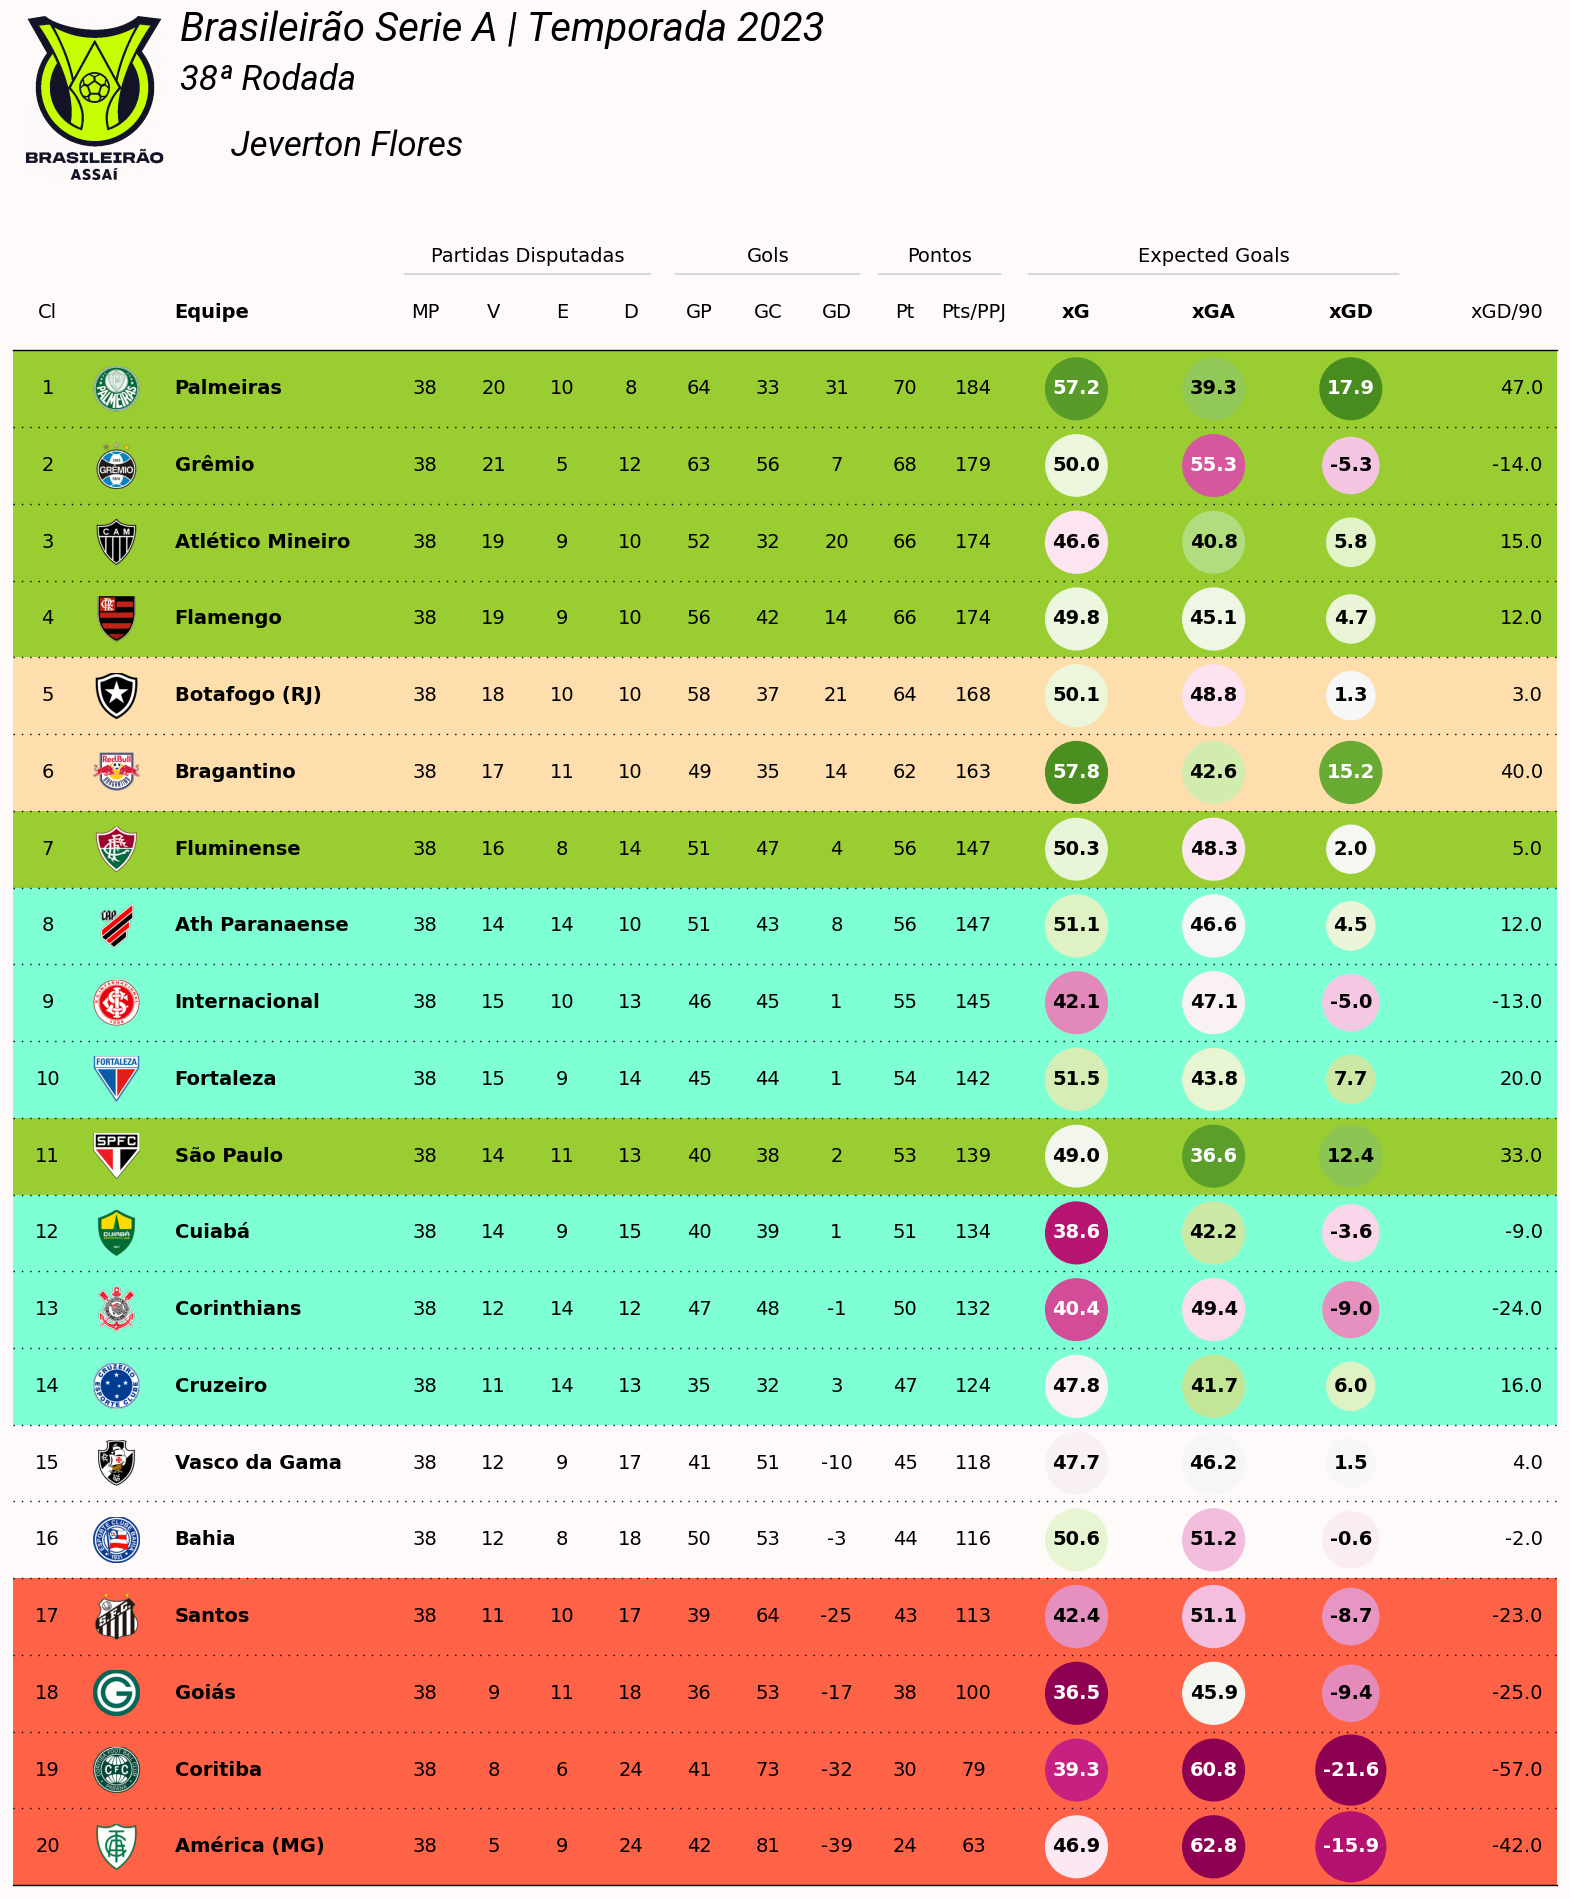

In [23]:
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    df_tab,
    column_definitions=col_defs,
    index_col="Cl",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": .5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=["xG", "xGA", "xGD"]) 

table.cells[10, 3].textprops["color"] = "#8ACB88"


TITLE = "Brasileirão Serie A | Temporada 2023"
SUB_TITLE = "38ª Rodada"
ASS = "      Jeverton Flores"

# add title
fig.text(0.21, 0.95, TITLE, size=29, color="black", fontproperties=font_bold.prop)

# add subtitle
fig_text(
    0.21, 0.94, SUB_TITLE, color="black",
    size=25, fig=fig, fontproperties=font_bold.prop
)
# add signature
fig_text(
    0.21, 0.91, ASS, color="black", size=25, fontproperties=font_bold.prop
)


# Adicione a imagem do campeonato
fig.figimage(br23, xo=25, yo=1710, origin='upper', zorder=10)  # Ajuste as coordenadas conforme necessário


for idx in [0, 1, 2, 3, 6, 10]:#Classificação dos times
    table.rows[idx].set_facecolor(row_colors["Libertadores"])
#
for idx in [4, 5]:
    table.rows[idx].set_facecolor(row_colors["Pre"])

for idx in [7,8,9,11,12,13]:
    table.rows[idx].set_facecolor(row_colors["Sula"])    
#
for idx in [16,17, 18, 19]:
    table.rows[idx].set_facecolor(row_colors["Queda"])

fig.savefig(
    "C:/Users/jeverton.rosa/lab_data/DA_python_soccer/images/brasileirão23.png",
    facecolor=ax.get_facecolor(),
    dpi=300,
    bbox_inches="tight",
)
fig.show()